In [1]:
%pip install imbalanced-learn

  Using cached imbalanced_learn-0.12.4-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.12.4-py3-none-any.whl (258 kB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from collections import Counter
import matplotlib.pyplot as plt

RANDOM_STATE = 55

In [4]:
df = pd.read_csv('cleaned.csv')

In [5]:
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,0.0,5.0,-1.00,0.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,0.0,4.0,-1.00,0.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,0.0,5.0,-1.00,0.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,0.0,1.0,-1.00,0.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [6]:
df = df.drop(['id', 'Name'], axis= 1)
df.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,0.0,5.0,-1.00,0.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,0.0,4.0,-1.00,0.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,0.0,5.0,-1.00,0.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,0.0,1.0,-1.00,0.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [7]:
x = df.drop(['Depression'], axis=1)
y = df['Depression']

In [8]:
num_columns = x.select_dtypes(include=['int64', 'float64']).columns
str_columns = x.select_dtypes(include=['object']).columns

print(num_columns)
print(str_columns)

Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress'],
      dtype='object')
Index(['Gender', 'City', 'Working Professional or Student', 'Profession',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')


In [9]:
num_pipline = Pipeline([
    ('scaler', preprocessing.StandardScaler())
])
str_pipline = Pipeline([
    ('ordinal', preprocessing.OrdinalEncoder())
])
preprocessor = ColumnTransformer([
    ('num', num_pipline, num_columns),
    ('str', str_pipline, str_columns)
])

In [10]:
x_processed = preprocessor.fit_transform(x)

In [11]:
x_processed

array([[ 0.66121471, -0.46402398,  1.53145116, ..., 31.        ,
         0.        ,  0.        ],
       [-1.26104184, -0.46402398,  0.95544968, ..., 61.        ,
         1.        ,  0.        ],
       [-0.67600724,  3.02929085, -1.34855626, ..., 19.        ,
         1.        ,  0.        ],
       ...,
       [-1.42819458, -0.46402398,  0.37944819, ..., 17.        ,
         0.        ,  0.        ],
       [ 0.66121471, -0.46402398,  1.53145116, ..., 82.        ,
         1.        ,  0.        ],
       [-1.17746547,  2.33062788, -1.34855626, ..., 27.        ,
         1.        ,  1.        ]])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_processed, y, test_size=0.2, random_state=42)


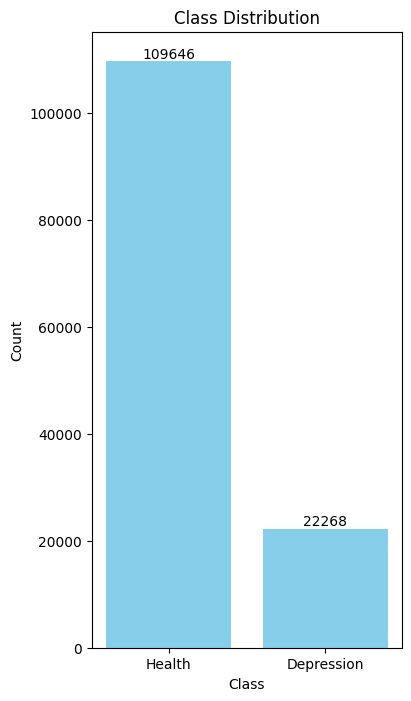

In [13]:
class_name = {
    0: 'Health',
    1: 'Depression'
}

count_labels = Counter(y)
cls_name = [class_name[id] for id in list(count_labels.keys())]
cls_num = list(count_labels.values())
plt.figure(figsize=(4, 8))
plt.bar(cls_name, cls_num, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(cls_name)
for i, cnt in enumerate(cls_num):
    plt.text(cls_name[i], cnt+0.1, str(cnt), ha='center', va='bottom')
plt.show()

In [14]:
x_test.shape

(26383, 17)

In [30]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

In [40]:
min_sample_split_reports = {}
for msp in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split=msp)
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    min_sample_split_reports[msp] = classification_report(y_test, y_predict)

In [41]:
for m, r in min_sample_split_reports.items():
    print(m)
    print(r)

2
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     21882
           1       0.84      0.79      0.81      4501

    accuracy                           0.94     26383
   macro avg       0.90      0.88      0.89     26383
weighted avg       0.94      0.94      0.94     26383

10
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     21882
           1       0.84      0.79      0.82      4501

    accuracy                           0.94     26383
   macro avg       0.90      0.88      0.89     26383
weighted avg       0.94      0.94      0.94     26383

30
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     21882
           1       0.84      0.79      0.82      4501

    accuracy                           0.94     26383
   macro avg       0.90      0.88      0.89     26383
weighted avg       0.94      0.94      0.94     26383

50
        

In [42]:
max_depth_reports = {}
for md in max_depth_list:
    model = RandomForestClassifier(max_depth=md)
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    max_depth_reports[md] = classification_report(y_test, y_predict)

In [ ]:
for m, r in max_depth_reports.items():
    print(m)
    print(r)

2
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     21882
           1       0.74      0.69      0.72      4501

    accuracy                           0.91     26383
   macro avg       0.84      0.82      0.83     26383
weighted avg       0.90      0.91      0.91     26383

4
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     21882
           1       0.82      0.66      0.73      4501

    accuracy                           0.92     26383
   macro avg       0.88      0.82      0.84     26383
weighted avg       0.91      0.92      0.91     26383

8
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     21882
           1       0.84      0.77      0.80      4501

    accuracy                           0.94     26383
   macro avg       0.90      0.87      0.88     26383
weighted avg       0.93      0.94      0.94     26383

16
          

In [44]:
n_estimators_reports = {}
for ne in n_estimators_list:
    model = RandomForestClassifier(n_estimators=ne)
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    n_estimators_reports[ne] = classification_report(y_test, y_predict)

In [45]:
for m, r in n_estimators_reports.items():
    print(m)
    print(r)

10
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     21882
           1       0.85      0.76      0.80      4501

    accuracy                           0.94     26383
   macro avg       0.90      0.86      0.88     26383
weighted avg       0.93      0.94      0.93     26383

50
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     21882
           1       0.84      0.79      0.81      4501

    accuracy                           0.94     26383
   macro avg       0.90      0.88      0.89     26383
weighted avg       0.94      0.94      0.94     26383

100
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     21882
           1       0.84      0.79      0.81      4501

    accuracy                           0.94     26383
   macro avg       0.90      0.88      0.89     26383
weighted avg       0.94      0.94      0.94     26383

500
     

In [54]:
model = RandomForestClassifier(n_estimators=500, min_samples_split=10, max_depth=64, class_weight='balanced')
model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=64,
                       min_samples_split=10, n_estimators=500)

In [55]:
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     21882
           1       0.78      0.86      0.82      4501

    accuracy                           0.94     26383
   macro avg       0.88      0.91      0.89     26383
weighted avg       0.94      0.94      0.94     26383



In [26]:
model_cw = RandomForestClassifier(class_weight='balanced')
model_cw.fit(x_train, y_train)
y_predict = model_cw.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     21882
           1       0.85      0.78      0.81      4501

    accuracy                           0.94     26383
   macro avg       0.90      0.87      0.89     26383
weighted avg       0.94      0.94      0.94     26383



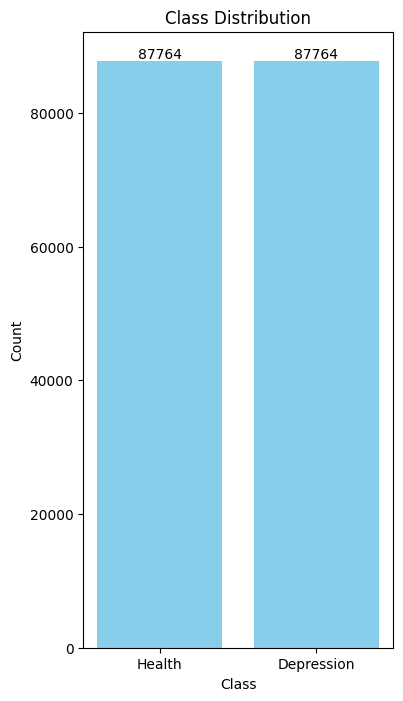

In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

count_labels = Counter(y_resampled)
cls_name = [class_name[id] for id in list(count_labels.keys())]
cls_num = list(count_labels.values())
plt.figure(figsize=(4, 8))
plt.bar(cls_name, cls_num, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(cls_name)
for i, cnt in enumerate(cls_num):
    plt.text(cls_name[i], cnt+0.1, str(cnt), ha='center', va='bottom')
plt.show()

In [38]:
model_smote = RandomForestClassifier(n_estimators=500, min_samples_split=30, max_depth=16)
model_smote.fit(X_resampled, y_resampled)
y_predict = model_smote.predict(x_test)
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.97      0.96      0.96     21882
           1       0.82      0.83      0.82      4501

    accuracy                           0.94     26383
   macro avg       0.89      0.90      0.89     26383
weighted avg       0.94      0.94      0.94     26383



              precision    recall  f1-score   support

           0       0.96      0.96      0.96     21882
           1       0.82      0.82      0.82      4501

    accuracy                           0.94     26383
   macro avg       0.89      0.89      0.89     26383
weighted avg       0.94      0.94      0.94     26383



In [31]:
min_sample_split_reports = {}
for msp in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split=msp)
    model.fit(X_resampled, y_resampled)
    y_predict = model.predict(x_test)
    min_sample_split_reports[msp] = classification_report(y_test, y_predict)

In [32]:
for m, r in min_sample_split_reports.items():
    print(m)
    print(r)

2
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     21882
           1       0.82      0.81      0.82      4501

    accuracy                           0.94     26383
   macro avg       0.89      0.89      0.89     26383
weighted avg       0.94      0.94      0.94     26383

10
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     21882
           1       0.83      0.81      0.82      4501

    accuracy                           0.94     26383
   macro avg       0.89      0.89      0.89     26383
weighted avg       0.94      0.94      0.94     26383

30
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     21882
           1       0.82      0.83      0.82      4501

    accuracy                           0.94     26383
   macro avg       0.89      0.89      0.89     26383
weighted avg       0.94      0.94      0.94     26383

50
        

In [33]:
max_depth_reports = {}
for md in max_depth_list:
    model = RandomForestClassifier(max_depth=md)
    model.fit(X_resampled, y_resampled)
    y_predict = model.predict(x_test)
    max_depth_reports[md] = classification_report(y_test, y_predict)

In [35]:
for m, r in max_depth_reports.items():
    print(m)
    print(r)

2
              precision    recall  f1-score   support

           0       0.96      0.89      0.93     21882
           1       0.62      0.83      0.71      4501

    accuracy                           0.88     26383
   macro avg       0.79      0.86      0.82     26383
weighted avg       0.90      0.88      0.89     26383

4
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     21882
           1       0.71      0.88      0.79      4501

    accuracy                           0.92     26383
   macro avg       0.84      0.90      0.87     26383
weighted avg       0.93      0.92      0.92     26383

8
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     21882
           1       0.78      0.85      0.82      4501

    accuracy                           0.93     26383
   macro avg       0.88      0.90      0.89     26383
weighted avg       0.94      0.93      0.94     26383

16
          

In [36]:
n_estimators_reports = {}
for ne in n_estimators_list:
    model = RandomForestClassifier(n_estimators=ne)
    model.fit(X_resampled, y_resampled)
    y_predict = model.predict(x_test)
    n_estimators_reports[ne] = classification_report(y_test, y_predict)

In [37]:
for m, r in n_estimators_reports.items():
    print(m)
    print(r)

10
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     21882
           1       0.82      0.78      0.80      4501

    accuracy                           0.93     26383
   macro avg       0.89      0.87      0.88     26383
weighted avg       0.93      0.93      0.93     26383

50
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     21882
           1       0.82      0.80      0.81      4501

    accuracy                           0.94     26383
   macro avg       0.89      0.88      0.89     26383
weighted avg       0.94      0.94      0.94     26383

100
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     21882
           1       0.82      0.81      0.82      4501

    accuracy                           0.94     26383
   macro avg       0.89      0.89      0.89     26383
weighted avg       0.94      0.94      0.94     26383

500
     